# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}&q={city}" 
    
    # Log the url, record, and set numbers
    #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]  
        city_lng = city_weather["coord"]["lon"]  
        city_max_temp = city_weather["main"]["temp_max"]  
        city_humidity = city_weather["main"]["humidity"]  
        city_clouds = city_weather["clouds"]["all"]  
        city_wind = city_weather["wind"]["speed"]  
        city_country = city_weather["sys"]["country"]  
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
  # Print statements for debugging
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        print(f"City Data Length: {len(city_data)}")
    except Exception as e:
        print(f"Error processing city {city}: {str(e)}")
        pass
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 2 of Set 1 | usinsk
City Data Length: 1
Processing Record 3 of Set 1 | bilibino
City Data Length: 2
Processing Record 4 of Set 1 | ilulissat
City Data Length: 3
Processing Record 5 of Set 1 | badger
City Data Length: 4
Processing Record 6 of Set 1 | krasnovishersk
City Data Length: 5
Processing Record 7 of Set 1 | kodiak
City Data Length: 6
Processing Record 8 of Set 1 | ribeira grande
City Data Length: 7
Processing Record 9 of Set 1 | laojunmiao
City Data Length: 8
Processing Record 10 of Set 1 | waitangi
City Data Length: 9
Processing Record 11 of Set 1 | ushuaia
City Data Length: 10
Processing Record 12 of Set 1 | xunchang
City Data Length: 11
Processing Record 13 of Set 1 | west island
City Data Length: 12
Processing Record 14 of Set 1 | malanje
City Data Length: 13
Error processing city sonsorol village: 'coord'
Processing Record 16 of Set 1 | jamestown
City Data Length: 14
Processing Record 17 of Set 1 

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,usinsk,65.9939,57.5281,-25.52,100,98,1.79,RU,1702166527
1,bilibino,68.0546,166.4372,-17.52,99,99,0.94,RU,1702166527
2,ilulissat,69.2167,-51.1000,-5.99,73,75,5.66,GL,1702166527
3,badger,64.8000,-147.5333,-22.58,79,29,1.25,US,1702166527
4,krasnovishersk,60.4078,57.0820,-31.68,99,16,0.81,RU,1702166528


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,usinsk,65.9939,57.5281,-25.52,100,98,1.79,RU,1702166527
1,bilibino,68.0546,166.4372,-17.52,99,99,0.94,RU,1702166527
2,ilulissat,69.2167,-51.1000,-5.99,73,75,5.66,GL,1702166527
3,badger,64.8000,-147.5333,-22.58,79,29,1.25,US,1702166527
4,krasnovishersk,60.4078,57.0820,-31.68,99,16,0.81,RU,1702166528


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

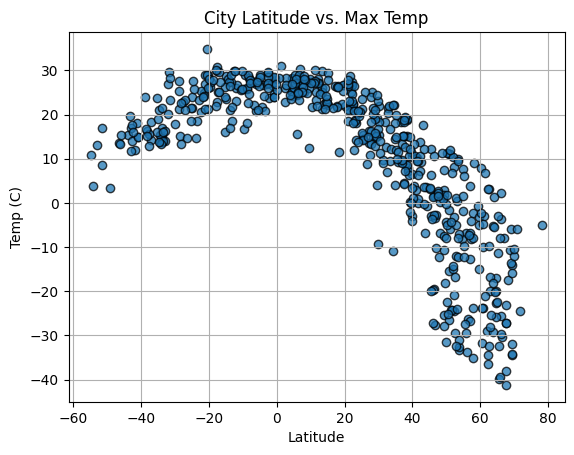

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors="black", alpha=0.75)
plt.title('City Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Temp (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/latvtemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

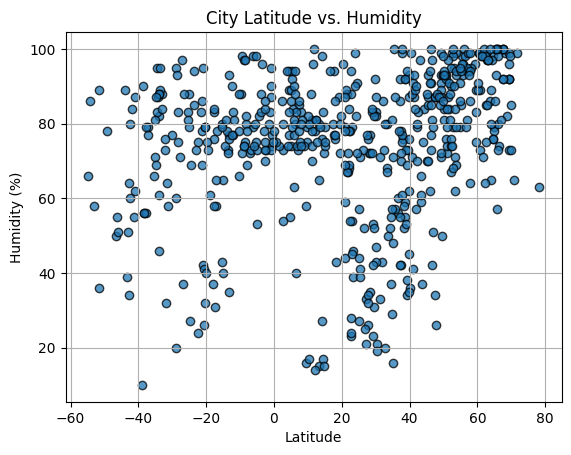

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors="black", alpha=0.75)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/latvh.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

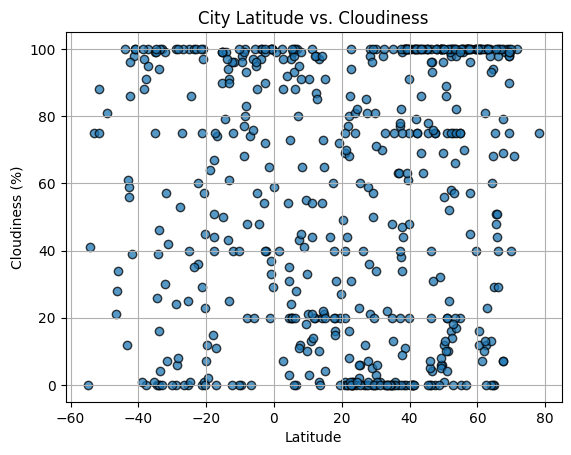

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors="black", alpha=0.75)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/latvc.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

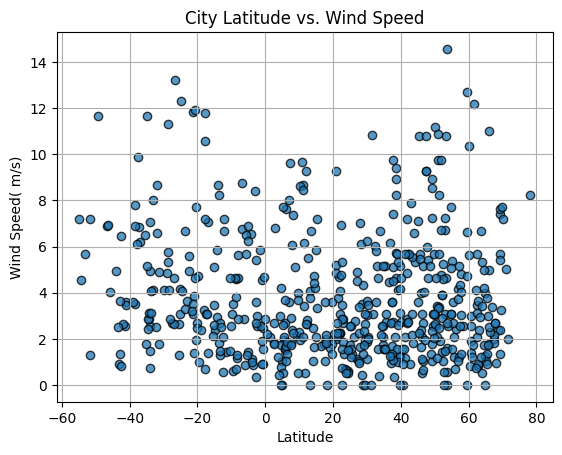

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors="black", alpha=0.75)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed( m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/latvw.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
def regression(x_values, y_values, xlabel, ylabel, hemisphere):
    # Perform linear regression
    slope, intercept, r_value , _, _ = linregress(x_values, y_values)

    # Calculate regression line
    regression_line = slope * x_values + intercept

    # Plot scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    
    # Plot regression line
    plt.plot(x_values, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}")

    # Label the plot
    plt.title(f"{hemisphere} Hemisphere - {xlabel} vs {ylabel}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Display the plot
    plt.legend()
    plt.grid(True)
    plt.show()

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,usinsk,65.9939,57.5281,-25.52,100,98,1.79,RU,1702166527
1,bilibino,68.0546,166.4372,-17.52,99,99,0.94,RU,1702166527
2,ilulissat,69.2167,-51.1000,-5.99,73,75,5.66,GL,1702166527
3,badger,64.8000,-147.5333,-22.58,79,29,1.25,US,1702166527
4,krasnovishersk,60.4078,57.0820,-31.68,99,16,0.81,RU,1702166528


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]< 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,waitangi,-43.9535,-176.5597,15.46,89,100,4.92,NZ,1702166480
9,ushuaia,-54.8000,-68.3000,10.81,66,0,7.20,AR,1702166491
11,west island,-12.1568,96.8225,25.99,83,40,7.20,CC,1702166530
12,malanje,-9.5402,16.3410,16.74,98,98,0.62,AO,1702166530
14,grytviken,-54.2811,-36.5092,3.77,86,41,4.54,GS,1702166358


###  Temperature vs. Latitude Linear Regression Plot

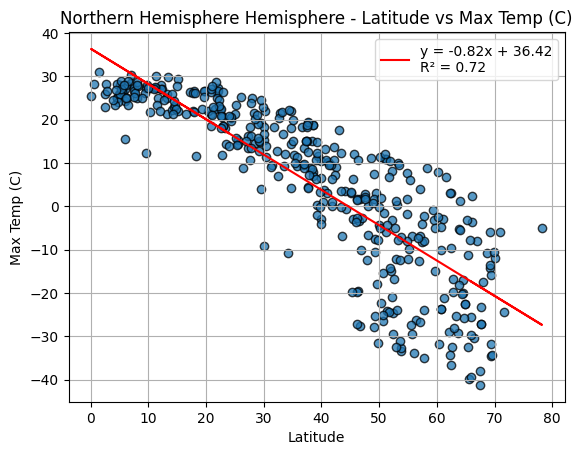

In [63]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp (C)', 'Northern Hemisphere')

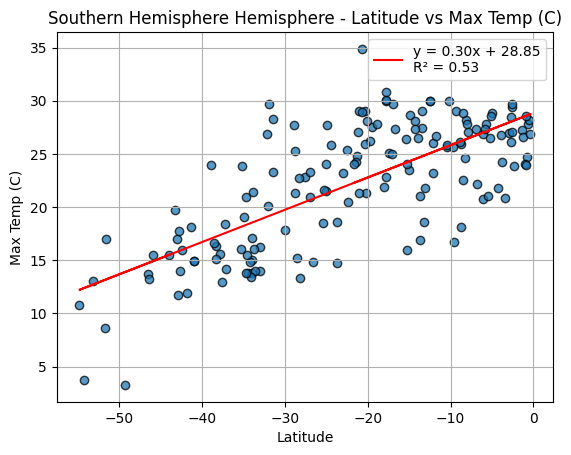

In [47]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp (C)', 'Southern Hemisphere')

**Discussion about the linear relationship:**
The relation


### Humidity vs. Latitude Linear Regression Plot

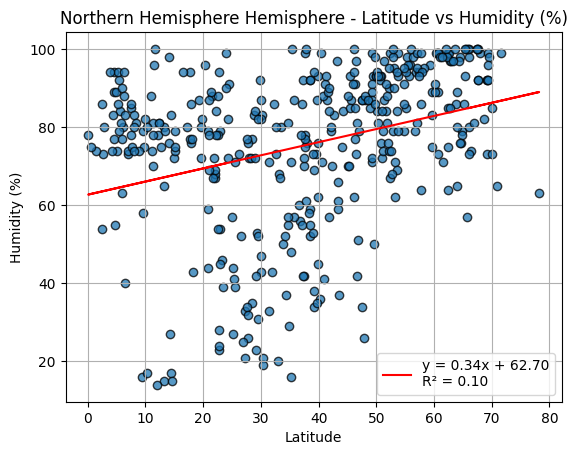

In [44]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', 'Northern Hemisphere')

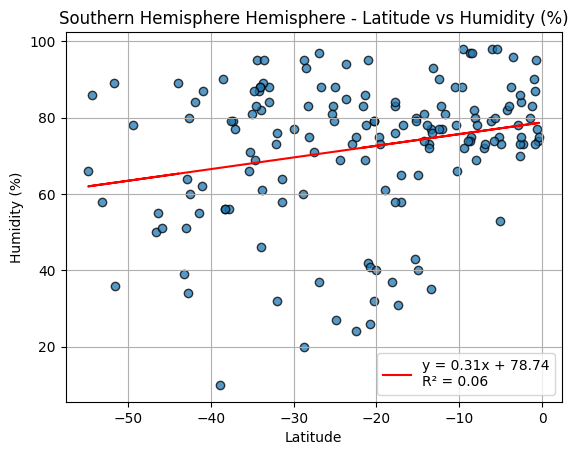

In [51]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', 'Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

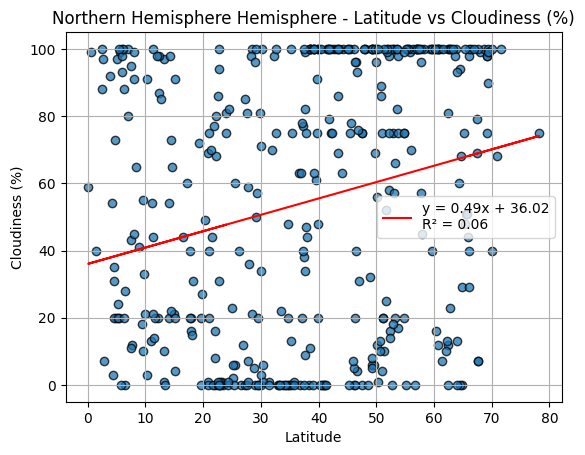

In [52]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Northern Hemisphere')

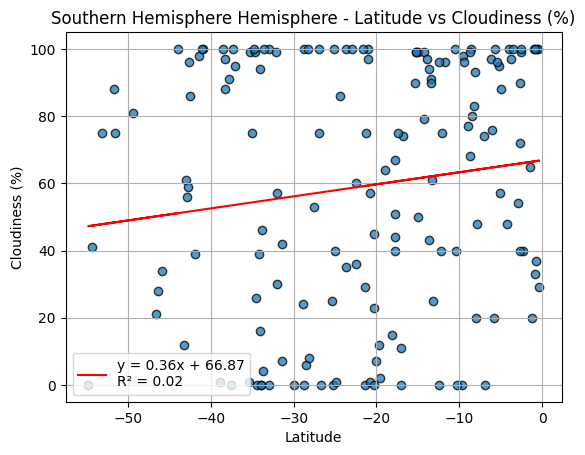

In [53]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

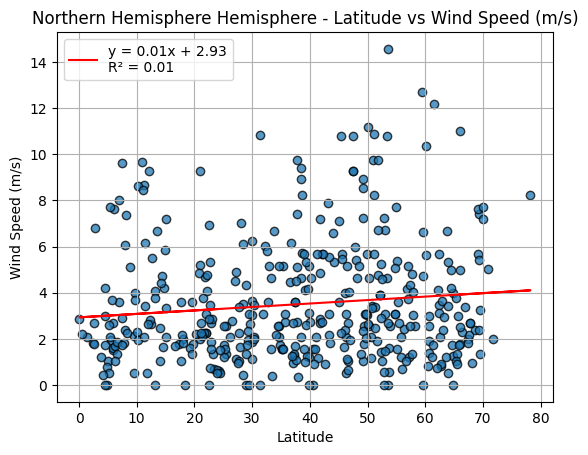

In [54]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 'Northern Hemisphere')

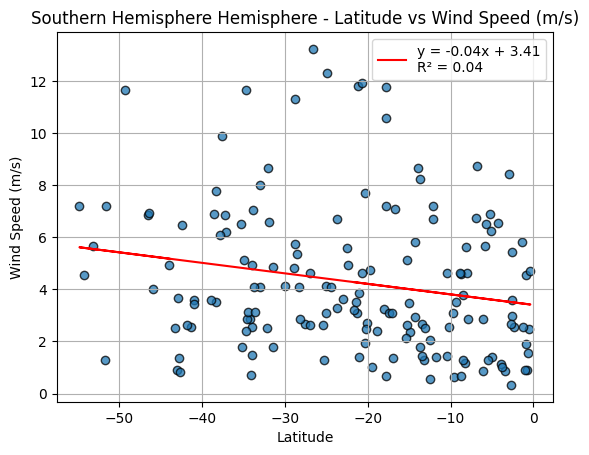

In [55]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 'Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE